In [32]:
# imports for EDA setcion of the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#imports for modeling
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [33]:
# Read in the data and print the first 5 rows
df = pd.read_csv("heart_data.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [34]:
# print the shape of the dataset as well as the number of null values
shp = df.shape
ina = len(df.columns[df.isna().any()])
nna = len(df.columns[df.notna().all()])
col = len(df.columns)
print(
    f"Shape of the dataset is {shp}"
    f"\n{ina} columns containing null values"
    f"\n{nna} columns containing no null values"
    f" \n{col} columns in total"
)



Shape of the dataset is (918, 12)
0 columns containing null values
12 columns containing no null values 
12 columns in total


In [4]:
# Print the information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Describe the dataset
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Check the correlation between the variables
df.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


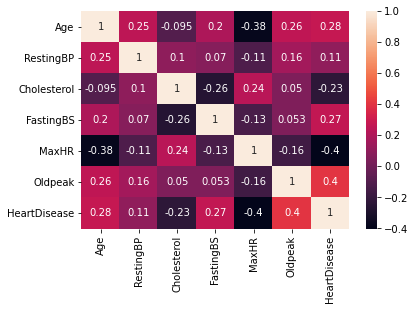

In [7]:
# Plot the correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()


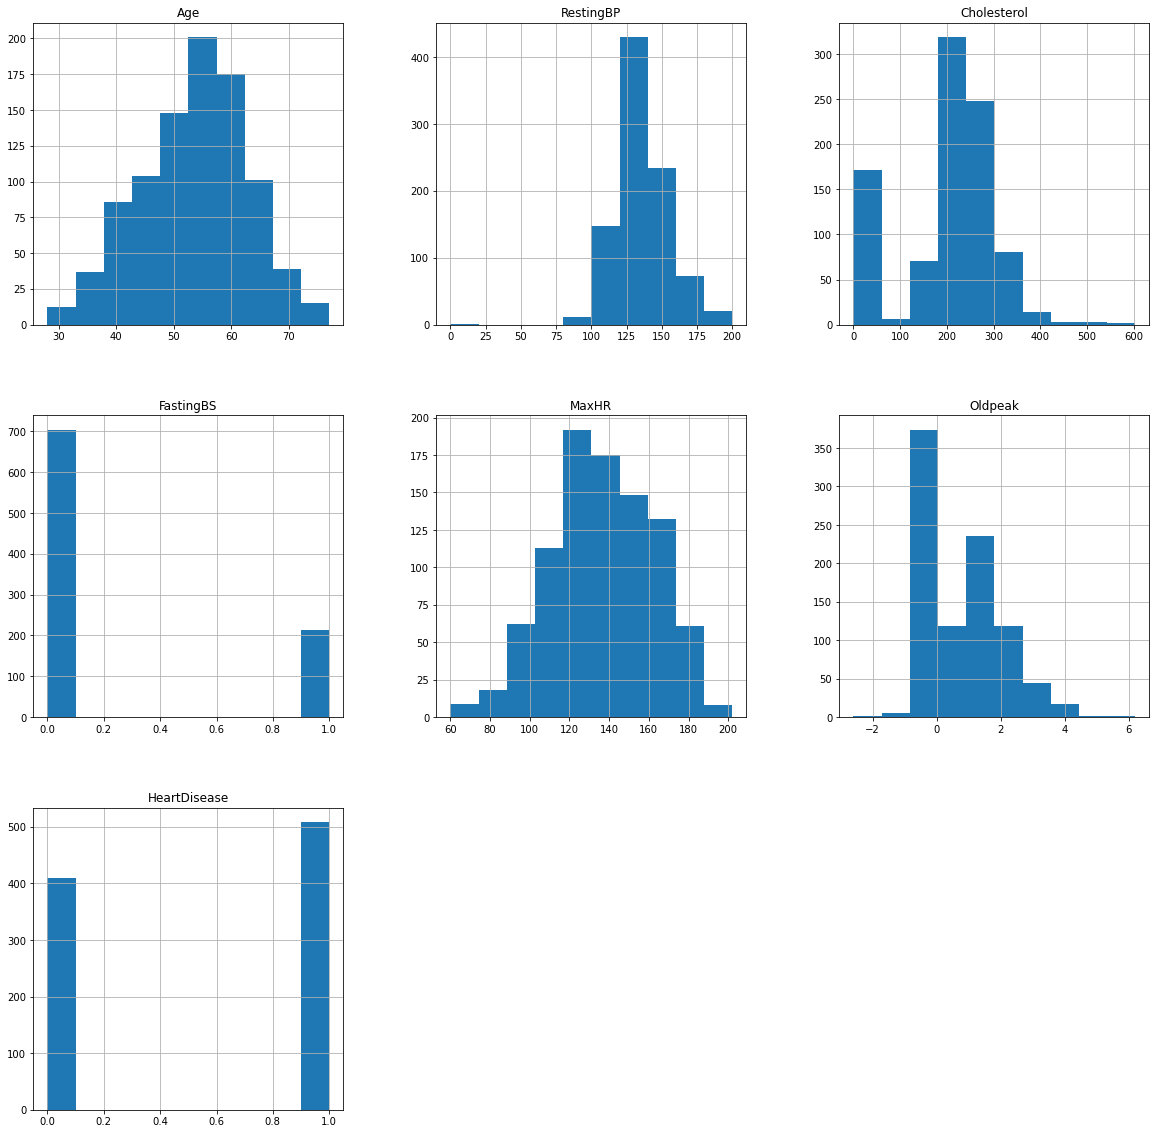

In [8]:
df.hist(figsize=(20, 20))
plt.show()


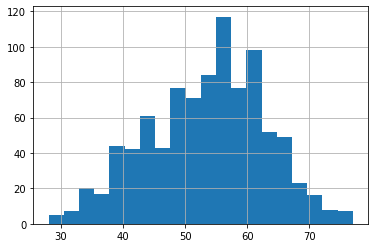

In [9]:
# Plot the histogram of the age variable
df["Age"].hist(bins=20)
plt.show()


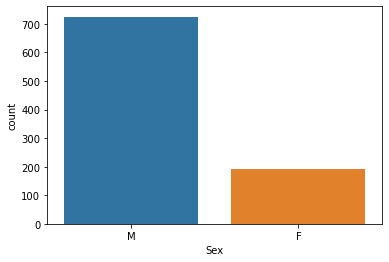

In [10]:
# Plot the value counts of the Sex column
sns.countplot(x="Sex", data=df)
plt.show()


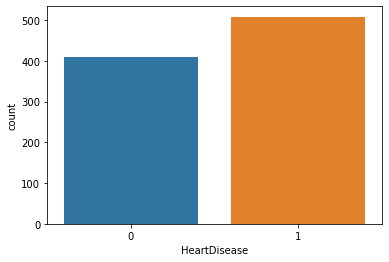

In [11]:
# Plot the barchart of the HeartDisease variable
sns.countplot(x="HeartDisease", data=df)
plt.show()


In [12]:
# create a copy of the dataframe
cp_df = df.copy()

# create a list of certain columns for further analysis
cols = [
    "Sex",
    "ChestPainType",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope",
    "HeartDisease",
    "FastingBS",
]

# create a list of all columns
all_cols = df.columns.tolist()


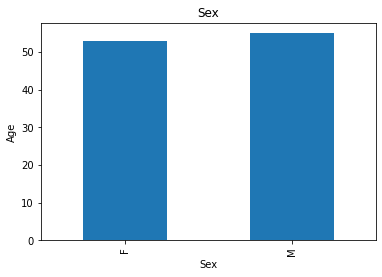

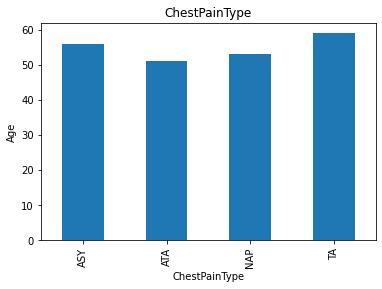

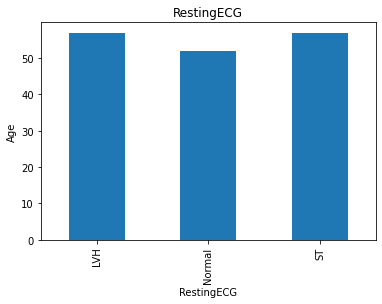

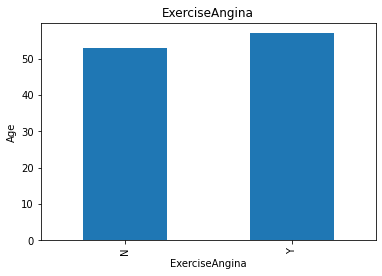

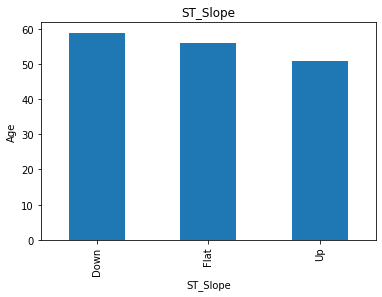

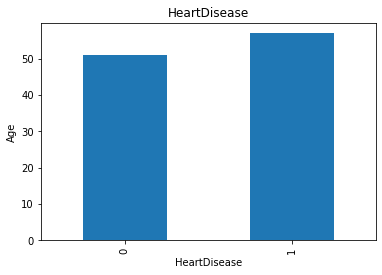

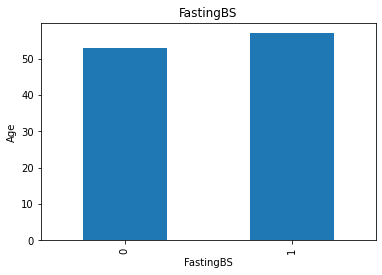

In [13]:
# Plot the barchart of the Age variable across select columns
for i in cols:
    cp_df.groupby(i)["Age"].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel("Age")
    plt.title(i)
    plt.show()


<AxesSubplot:xlabel='Age'>

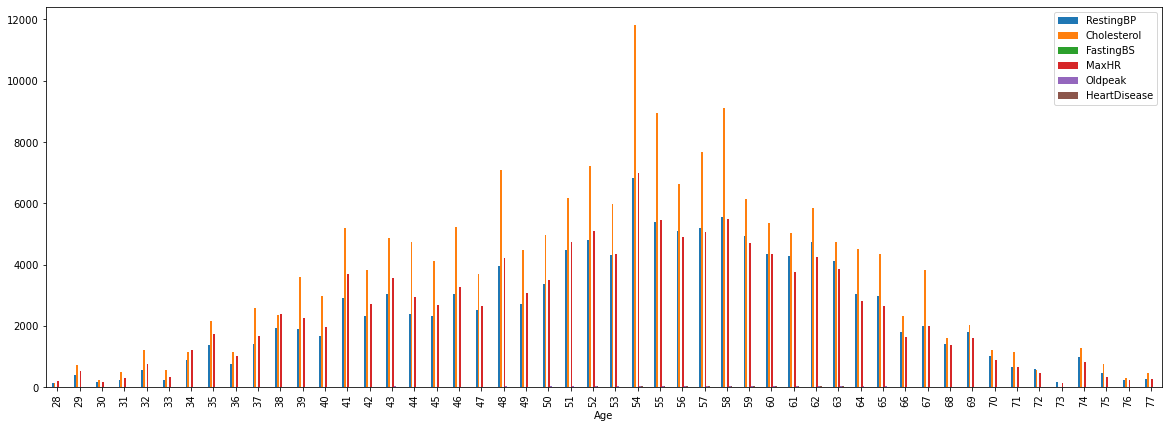

In [14]:
# aggregate the data by the age variable and calculate the sum of the rest of the variables
df.groupby("Age")[all_cols[1:]].sum().plot.bar(figsize=(20, 7))



In [15]:
# aggregate the data by the age variable and calculate the mean of the rest of the variables
df.groupby("Sex")[all_cols].aggregate("mean")



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Sex,,,,,,,
F,52.492228,132.212435,241.196891,0.134715,146.139896,0.668912,0.259067
M,53.782069,132.445517,187.513103,0.259310,134.325517,0.945517,0.631724


# Prepare the data for modeling and training

In [16]:
# encode the dataframe with dummies variables
obj = df.select_dtypes(include=object).columns
df = pd.get_dummies(data=df, columns=obj, drop_first=True)
df.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [17]:
# split the dataset in train and test set
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(734, 15) (184, 15) (734,) (184,)


In [18]:
# apply the standard scaler to the train and test set
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Prediction of Heart Failure using Gradient Boosting Classifier

In [19]:
# apply the gradient boosting classifier to the train and test set
clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [31]:
# print the classification report
print(classification_report(y_test, y_pred))

# print the confusion matrix
print(f"Confusion Matrix\n{confusion_matrix(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       0.84      0.73      0.78        77
           1       0.82      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184

Confusion Matrix
[[56 21]
 [11 96]]


# Prediction of Heart Failure with Logistic Regression Classifier

In [21]:
# apply the logistic regression classifier to the train and test set
clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [22]:
# print the classification report
print(classification_report(y_test, y_pred))

# print the confusion matrix
print(f"Confusion Matrix\n{confusion_matrix(y_test, y_pred)}")



              precision    recall  f1-score   support

           0       0.84      0.73      0.78        77
           1       0.82      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184

Confusion Matrix
[[56 21]
 [11 96]]


## Prediction of Heart Failure with L1 Logistic Regression Classifier

In [23]:
# apply the L1 regularized logistic regression classifier to the train and test set
clf = LogisticRegressionCV(penalty="l1", solver="liblinear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [24]:
# print the classification report
print(classification_report(y_test, y_pred))

# print the confusion matrix
print(f"Confusion Matrix\n{confusion_matrix(y_test, y_pred)}")



              precision    recall  f1-score   support

           0       0.83      0.74      0.78        77
           1       0.83      0.89      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184

Confusion Matrix
[[57 20]
 [12 95]]


## Prediction of Heart Failure with L2 Logistic Regression Classifier

In [25]:
# apply L2 regularized logistic regression classifier to the train and test set
clf = LogisticRegressionCV(penalty="l2", solver="liblinear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [26]:
# print the classification report
print(classification_report(y_test, y_pred))

# print the confusion matrix
print(f"Confusion Matrix\n{confusion_matrix(y_test, y_pred)}")



              precision    recall  f1-score   support

           0       0.84      0.73      0.78        77
           1       0.82      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184

Confusion Matrix
[[56 21]
 [11 96]]
